### Importing Libraries

In [165]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pickle

# UNDERSTANDING THE DATASET

In [166]:
df = pd.read_csv('E:/STUDY/machine_learning/dataset_churn.csv')
df.info() #provides a concise summary of a dataframe such as seen below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3749 non-null   int64  
 1   CustomerID        3749 non-null   object 
 2   Age               3562 non-null   float64
 3   Gender            3749 non-null   object 
 4   Tenure            3749 non-null   int64  
 5   Service_Internet  3028 non-null   object 
 6   Service_Phone     3749 non-null   object 
 7   Service_TV        3749 non-null   object 
 8   Contract          3749 non-null   object 
 9   PaymentMethod     3562 non-null   object 
 10  MonthlyCharges    3749 non-null   float64
 11  TotalCharges      3749 non-null   float64
 12  StreamingMovies   3749 non-null   object 
 13  StreamingMusic    3749 non-null   object 
 14  OnlineSecurity    3749 non-null   object 
 15  TechSupport       3749 non-null   object 
 16  Churn             3749 non-null   object 


In [167]:
df.head() #used to get a gist of the dataset by displaying the first few rows

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,0,08729464-bde6-43bc-8f63-a357096feab1,56.0,Male,13,DSL,Yes,No,One year,Mailed check,71.88,931.49,No,No,Yes,No,No
1,1,af95bc95-baf4-4318-a21d-70d2ea3148b7,69.0,Male,13,DSL,No,Yes,Two year,Mailed check,110.99,1448.46,Yes,Yes,No,No,No
2,2,1fe7eee6-2227-4400-9998-4d993f4a60fd,46.0,Male,60,Fiber optic,No,Yes,Month-to-month,Mailed check,116.74,6997.73,Yes,Yes,No,No,No
3,3,f736fe7b-1b44-4acd-84c2-21c4aef648be,32.0,Female,57,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,78.16,4452.13,No,Yes,No,Yes,No
4,4,4b40d12d-7633-4309-96b8-aee675ea20ae,60.0,Male,52,Fiber optic,Yes,Yes,Two year,Electronic check,30.33,1569.73,Yes,No,Yes,Yes,No


In [168]:
#removing/dropping first two columns - Unnamed:0 and CustomerID as they do not have valuable information with regards to prediction
df = df.drop(['Unnamed: 0', 'CustomerID'], axis=1)

In [169]:
df.describe() #basic statistical information regarding the dataset ()

,Age,Tenure,MonthlyCharges,TotalCharges
count,3562.000000,3749.000000,3749.000000,3749.000000
mean,43.655531,36.264070,75.844318,2718.968266
std,14.914474,20.505528,73.062971,3211.879149
min,18.000000,1.000000,20.000000,13.190000
25%,31.000000,19.000000,44.570000,1076.240000
50%,44.000000,36.000000,69.590000,2132.260000
75%,56.000000,54.000000,95.540000,3619.710000
max,69.000000,71.000000,1179.300000,79951.800000


C:\Users\kanis\AppData\Local\Temp\ipykernel_8340\3923818589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['skyblue'])
C:\Users\kanis\AppData\Local\Temp\ipykernel_8340\3923818589.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Churn', data=df, palette=['skyblue'])


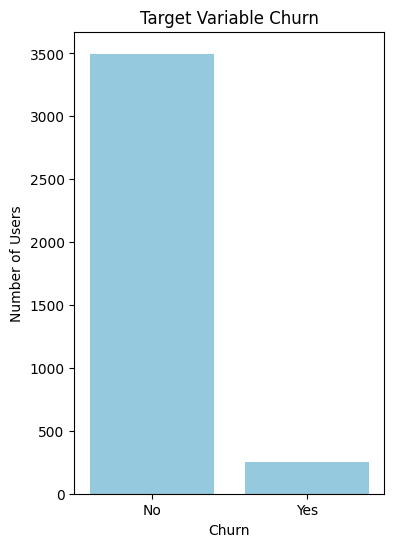

In [170]:
plt.figure(figsize=(4, 6))
sns.countplot(x='Churn', data=df, palette=['skyblue'])
plt.xlabel("Churn")
plt.ylabel("Number of Users")
plt.title("Target Variable Churn")
plt.show()

### Fixing the null value conundrum

In [171]:
df.isnull().sum() #finding the number of null values in each column

Age                 187
Gender                0
Tenure                0
Service_Internet    721
Service_Phone         0
Service_TV            0
Contract              0
PaymentMethod       187
MonthlyCharges        0
TotalCharges          0
StreamingMovies       0
StreamingMusic        0
OnlineSecurity        0
TechSupport           0
Churn                 0
dtype: int64

In [172]:
print(df['PaymentMethod'].value_counts())
print(df['Service_Internet'].value_counts())

PaymentMethod
Electronic check    1400
Bank transfer        742
Mailed check         730
Credit card          690
Name: count, dtype: int64
Service_Internet
Fiber optic    1908
DSL            1120
Name: count, dtype: int64


In [173]:
#replacing the null values in these columns by "Unidentified".
for column in ['Service_Internet', 'PaymentMethod']:
    df[column] = df[column].fillna('Unidentified')
df.isnull().sum()
#replacing null values of Age column with the mean of the column
df['Age'] = df['Age'].fillna(df['Age'].mean())

### visualization of the distribution of the numerical features

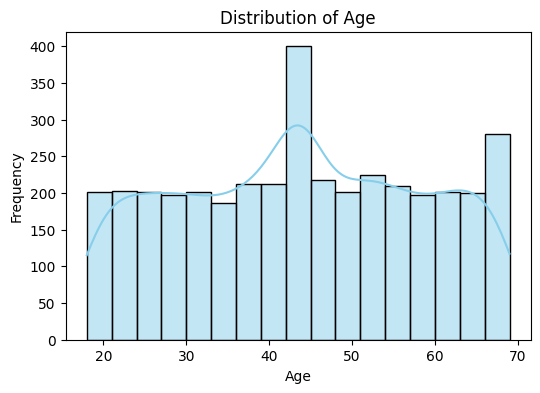

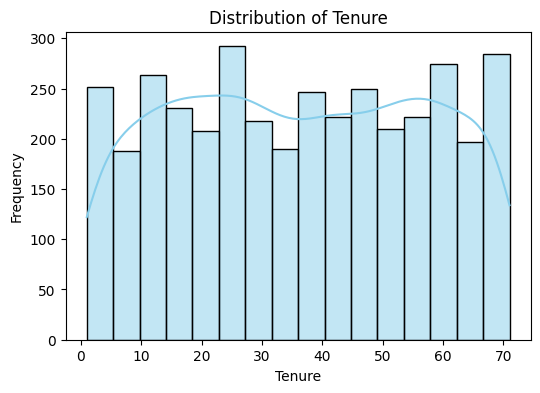

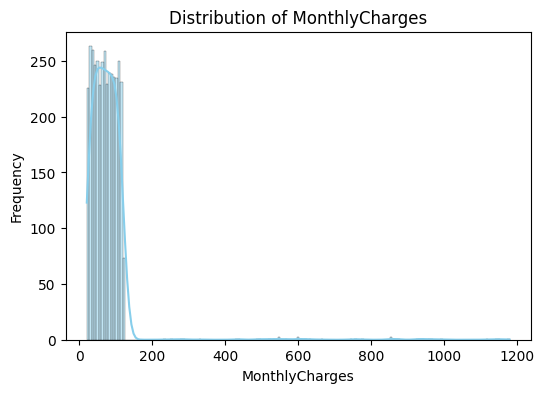

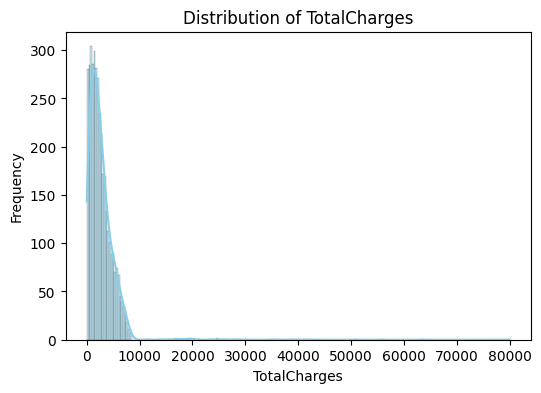

In [174]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [175]:
#target variable's percent distribution (Churn)
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     93.304881
Yes     6.695119
Name: count, dtype: float64

### Label Encoding on categorical features (non-numerical features)

In [176]:
cat_features = ['Gender', 'Service_Internet', 'Service_Phone', 'Service_TV', 'Contract', 'PaymentMethod', 
                'StreamingMovies', 'StreamingMusic', 'OnlineSecurity', 'TechSupport', 'Churn']

#label encoding
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])
df.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,56.0,1,13,0,1,0,1,3,71.88,931.49,0,0,1,0,0
1,69.0,1,13,0,0,1,2,3,110.99,1448.46,1,1,0,0,0
2,46.0,1,60,1,0,1,0,3,116.74,6997.73,1,1,0,0,0
3,32.0,0,57,1,1,1,0,0,78.16,4452.13,0,1,0,1,0
4,60.0,1,52,1,1,1,2,2,30.33,1569.73,1,0,1,1,0


# Outliers Identification and Treatment

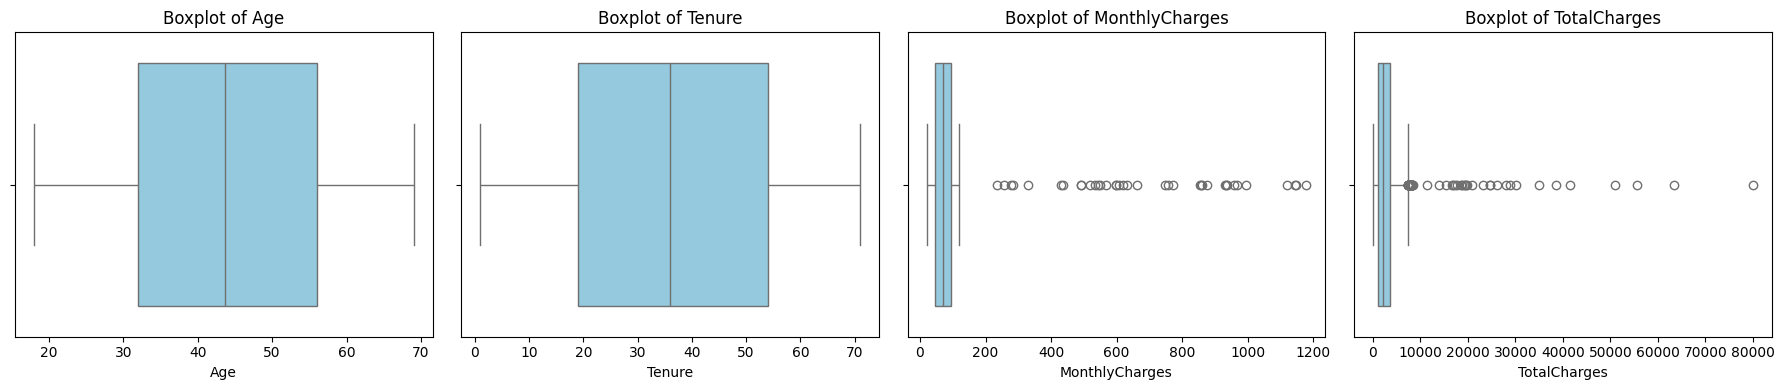

In [177]:
#selecting originally numerical features only
num_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 4))

for i, feature in enumerate(num_features):
    plt.subplot(1, len(num_features), i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [178]:
num_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

#using similar looping tactic to cap the outliers out
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #here we use the inter-quartile ranges and replace the outliers with the upper and lower bounds depending where it lies
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, np.where(df[feature] < lower_bound, lower_bound, df[feature]))
df.describe()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,43.655531,0.505468,36.264070,0.893572,0.699120,0.583622,0.628968,1.714591,70.685400,2557.509764,0.510269,0.495866,0.409176,0.396372,0.066951
std,14.537648,0.500037,20.505528,0.692723,0.458702,0.493023,0.809972,1.135276,30.446513,1879.775348,0.499961,0.500050,0.491747,0.489209,0.249971
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,13.190000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.570000,1076.240000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.655531,1.000000,36.000000,1.000000,1.000000,1.000000,0.000000,2.000000,69.590000,2132.260000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,2.000000,95.540000,3619.710000,1.000000,1.000000,1.000000,1.000000,0.000000
max,69.000000,1.000000,71.000000,2.000000,1.000000,1.000000,2.000000,4.000000,171.995000,7434.915000,1.000000,1.000000,1.000000,1.000000,1.000000


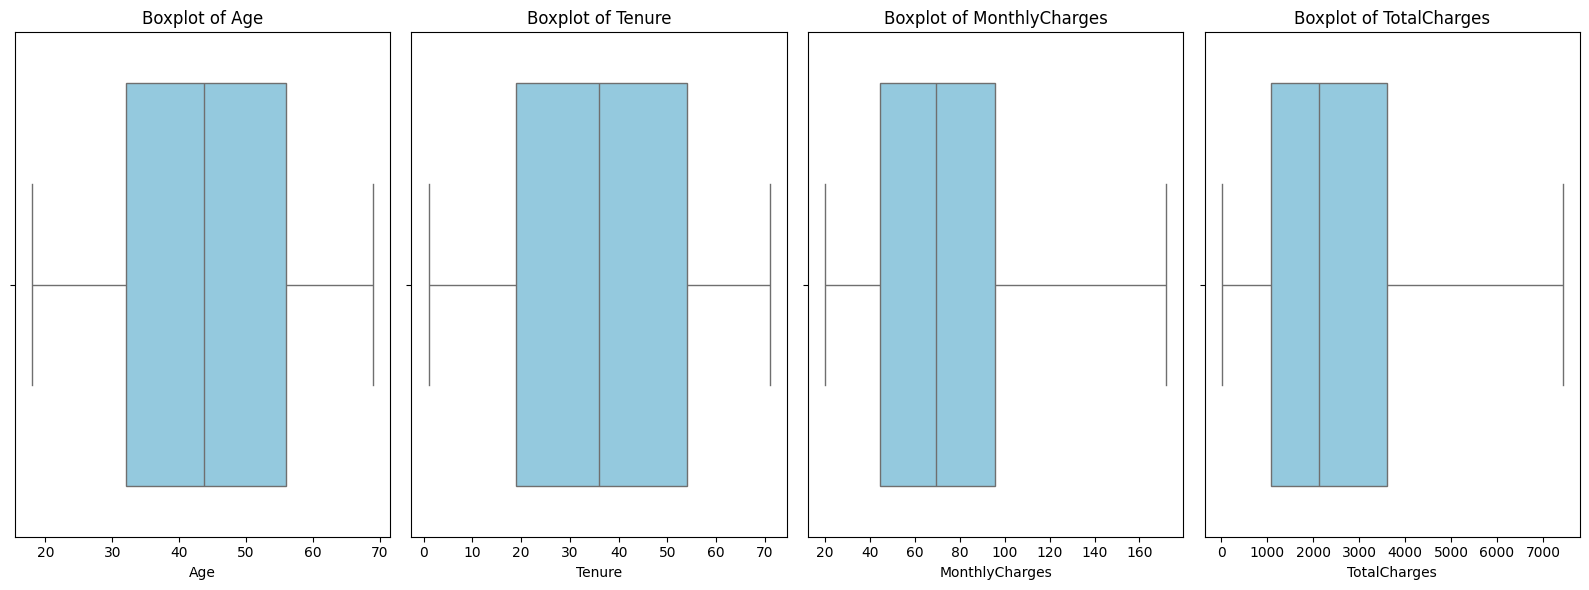

In [179]:
#boxplot after outlier treatment.
plt.figure(figsize=(16, 6))
for i, feature in enumerate(num_features):
    plt.subplot(1, len(num_features), i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [180]:
#distribution of churn
df['Churn'].value_counts()

Churn
0    3498
1     251
Name: count, dtype: int64

# Creating the new features 

   NumberOfServices  PerServiceMonthlyCost  ServiceUsageScore
0                 2              35.940000             143.76
1                 3              36.996667             332.97
2                 4              29.185000             466.96
3                 5              15.632000             390.80
4                 6               5.055000             181.98


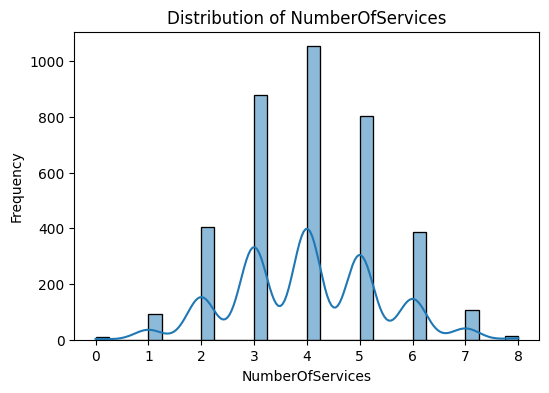

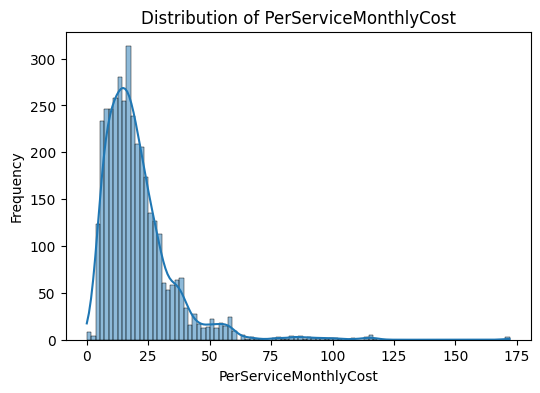

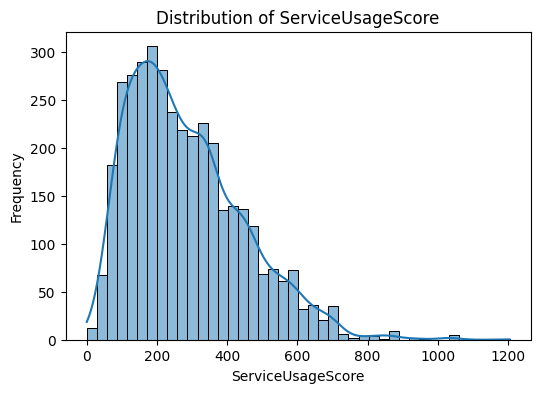

In [181]:
#NumberOfServices
df['NumberOfServices'] = (df['Service_Internet'] + df['Service_Phone'] + df['Service_TV'] + df['StreamingMovies'] + df['StreamingMusic'] + df['OnlineSecurity'] + df['TechSupport'])

#PerServiceMonthlyCost
df['PerServiceMonthlyCost'] = df['MonthlyCharges'] / df['NumberOfServices']
df['PerServiceMonthlyCost'] = df['PerServiceMonthlyCost'].replace([np.inf, -np.inf], 0)  #replacing infinite values with 0
df['PerServiceMonthlyCost'] = df['PerServiceMonthlyCost'].fillna(0)  #replacing NaN values with 0

#ServiceUsageScore
df['ServiceUsageScore'] = df['NumberOfServices'] * df['MonthlyCharges']

print(df[['NumberOfServices', 'PerServiceMonthlyCost',  'ServiceUsageScore']].head())

#distributions of new features
new_features = ['NumberOfServices', 'PerServiceMonthlyCost',  'ServiceUsageScore']
for feature in new_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

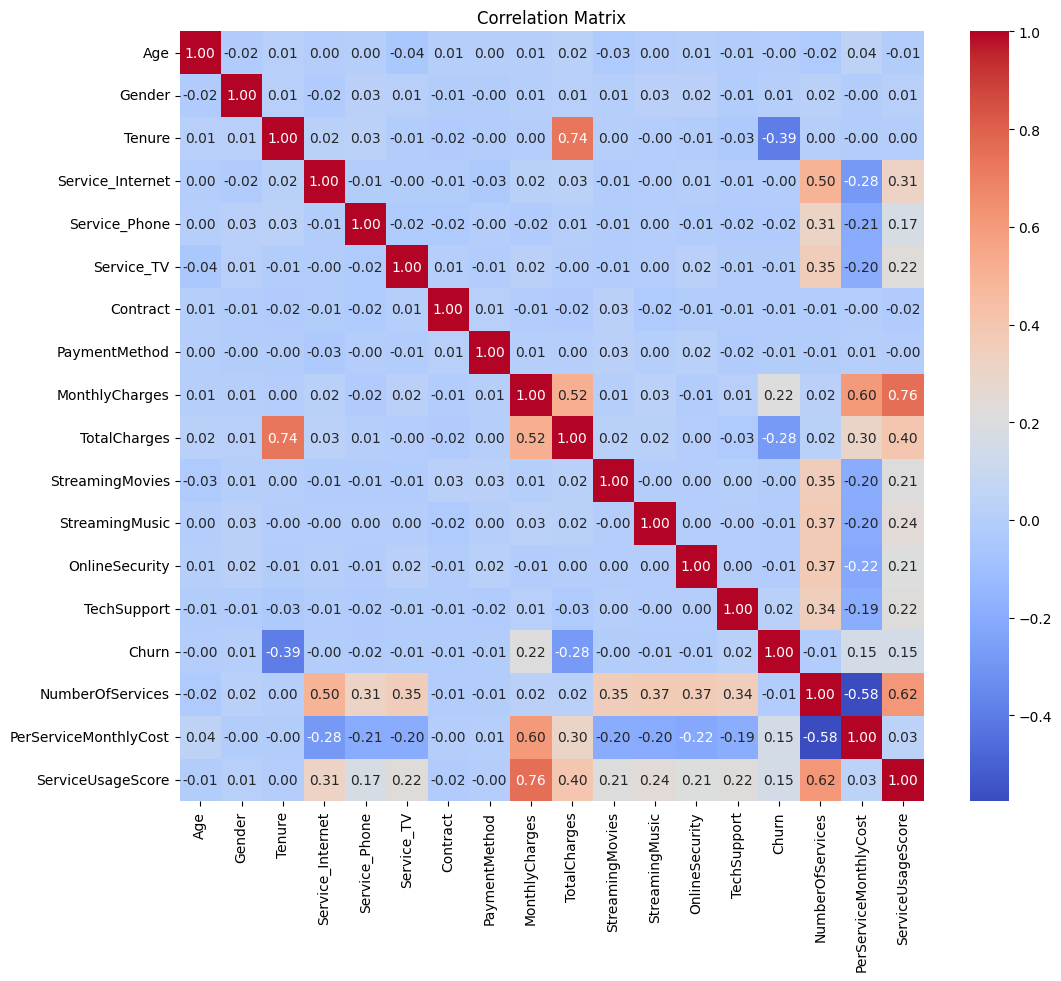

In [182]:
#correlation matrix for all features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# scale the data 

In [183]:
#normalizing only numerical features
all_num_features=['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges','PerServiceMonthlyCost','ServiceUsageScore']
min_max = MinMaxScaler()
df[all_num_features] = min_max.fit_transform(df[all_num_features])

In [184]:
df.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn,NumberOfServices,PerServiceMonthlyCost,ServiceUsageScore
0,0.745098,1,0.171429,0,1,0,1,3,0.341327,0.123731,0,0,1,0,0,2,0.208960,0.119405
1,1.000000,1,0.171429,0,0,1,2,3,0.598638,0.193388,1,1,0,0,0,3,0.215103,0.276561
2,0.549020,1,0.842857,1,0,1,0,3,0.636468,0.941094,1,1,0,0,0,4,0.169685,0.387852
3,0.274510,0,0.800000,1,1,1,0,0,0.382644,0.598101,0,1,0,1,0,5,0.090886,0.324594
4,0.823529,1,0.728571,1,1,1,2,2,0.067963,0.209728,1,0,1,1,0,6,0.029390,0.151151


In [185]:
df.describe()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn,NumberOfServices,PerServiceMonthlyCost,ServiceUsageScore
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.503050,0.505468,0.503772,0.893572,0.699120,0.583622,0.628968,1.714591,0.333468,0.342821,0.510269,0.495866,0.409176,0.396372,0.066951,3.987997,0.119802,0.234994
std,0.285052,0.500037,0.292936,0.692723,0.458702,0.493023,0.809972,1.135276,0.200313,0.253280,0.499961,0.500050,0.491747,0.489209,0.249971,1.367255,0.085822,0.135375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274510,0.000000,0.257143,0.000000,0.000000,0.000000,0.000000,1.000000,0.161650,0.143235,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.066200,0.129572
50%,0.503050,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,2.000000,0.326261,0.285523,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.101127,0.209682
75%,0.745098,1.000000,0.757143,1.000000,1.000000,1.000000,1.000000,2.000000,0.496990,0.485941,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.147446,0.314926
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000


In [186]:
df.to_csv('E:/STUDY/machine_learning/preprocessed_data.csv')

# split the data 

In [187]:
#target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

#spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [188]:
X_train.to_csv('E:/STUDY/machine_learning/X_train_data.csv')
y_train.to_csv('E:/STUDY/machine_learning/y_train_data.csv')
X_test.to_csv('E:/STUDY/machine_learning/X_test_data.csv')
y_test.to_csv('E:/STUDY/machine_learning/y_test_data.csv')

In [189]:
print(y_train.value_counts(),y_test.value_counts())

Churn
0    2791
1     208
Name: count, dtype: int64 Churn
0    707
1     43
Name: count, dtype: int64


In [190]:
#relation of each feature with churn.
correlation = df.corr()['Churn'].sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation)

Correlation with target variable:
Churn                    1.000000
MonthlyCharges           0.216778
PerServiceMonthlyCost    0.151159
ServiceUsageScore        0.150515
TechSupport              0.018568
Gender                   0.006676
Age                     -0.003401
Service_Internet        -0.003523
StreamingMovies         -0.004435
Service_TV              -0.005389
PaymentMethod           -0.007862
StreamingMusic          -0.009525
Contract                -0.011690
OnlineSecurity          -0.012379
NumberOfServices        -0.013261
Service_Phone           -0.019730
TotalCharges            -0.276757
Tenure                  -0.392958
Name: Churn, dtype: float64


In [191]:
#finding most important features by RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Tenure                   0.381768
MonthlyCharges           0.207348
TotalCharges             0.173201
ServiceUsageScore        0.105555
PerServiceMonthlyCost    0.093478
NumberOfServices         0.012869
Age                      0.005873
PaymentMethod            0.003725
Service_Internet         0.002354
StreamingMovies          0.002323
OnlineSecurity           0.002236
Service_TV               0.001903
Contract                 0.001900
TechSupport              0.001805
Service_Phone            0.001460
StreamingMusic           0.001125
Gender                   0.001075
dtype: float64


# train and evaluate models with all features

In [192]:
def model_evaluation(X_train, X_test, y_train, y_test):
    #dictionary of models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    results = {}
    
    #loop through each model
    for model_name, model in models.items():
        #cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(f"{model_name}")
        print(f"Cross-validation Train Accuracy: {cv_scores.mean():.4f} with std: {cv_scores.std():.4f}")
        
        #fit the model
        model.fit(X_train, y_train)
        
        #predictions
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        
        #metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        
        cm = confusion_matrix(y_test, y_pred)
    
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        
        plt.figure(figsize=(5, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        
    


Logistic Regression
Cross-validation Train Accuracy: 0.9610 with std: 0.0043
Test Accuracy: 0.9707
Precision: 0.9200
Recall: 0.5349
F1-score: 0.6765
ROC AUC: 0.9919


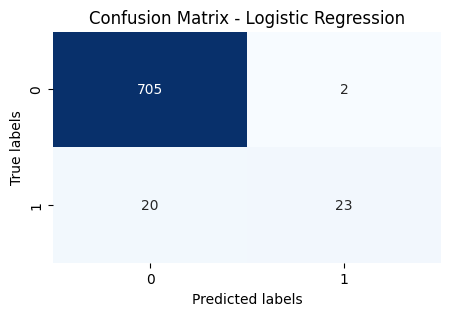

Decision Tree
Cross-validation Train Accuracy: 0.9990 with std: 0.0013
Test Accuracy: 0.9987
Precision: 0.9773
Recall: 1.0000
F1-score: 0.9885
ROC AUC: 0.9993


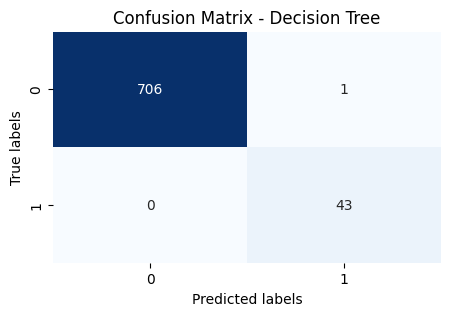

Random Forest
Cross-validation Train Accuracy: 0.9993 with std: 0.0008
Test Accuracy: 0.9987
Precision: 0.9773
Recall: 1.0000
F1-score: 0.9885
ROC AUC: 0.9994


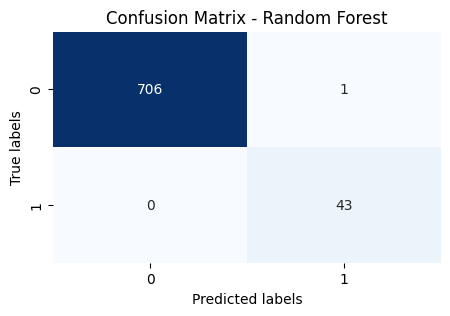

Gradient Boosting
Cross-validation Train Accuracy: 0.9990 with std: 0.0013
Test Accuracy: 0.9987
Precision: 0.9773
Recall: 1.0000
F1-score: 0.9885
ROC AUC: 0.9993


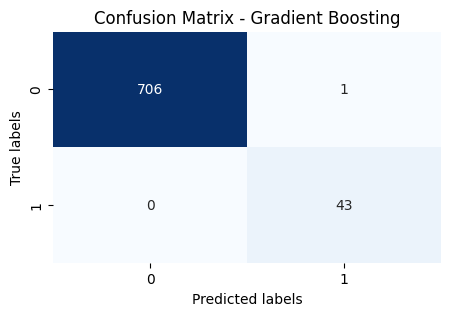

In [193]:
model_evaluation(X_train, X_test, y_train, y_test)

# with only important selected features

Evaluating models using selected features
Logistic Regression
Cross-validation Train Accuracy: 0.9613 with std: 0.0055
Test Accuracy: 0.9733
Precision: 0.9259
Recall: 0.5814
F1-score: 0.7143
ROC AUC: 0.9917


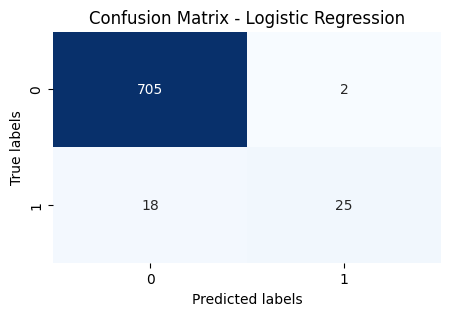

Decision Tree
Cross-validation Train Accuracy: 0.9990 with std: 0.0013
Test Accuracy: 0.9987
Precision: 0.9773
Recall: 1.0000
F1-score: 0.9885
ROC AUC: 0.9993


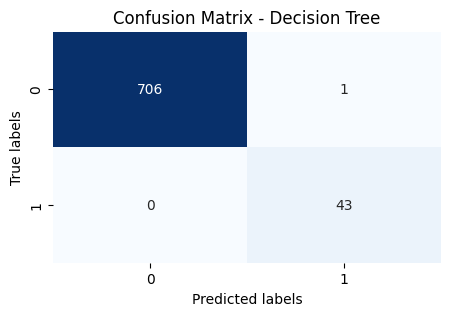

Random Forest
Cross-validation Train Accuracy: 0.9993 with std: 0.0008
Test Accuracy: 0.9987
Precision: 0.9773
Recall: 1.0000
F1-score: 0.9885
ROC AUC: 0.9997


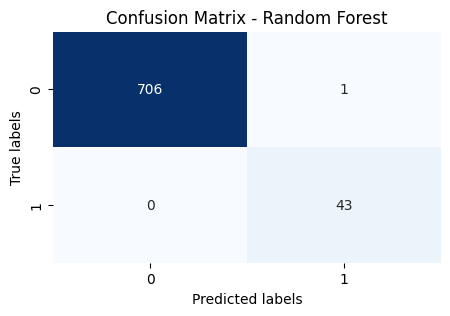

Gradient Boosting
Cross-validation Train Accuracy: 0.9990 with std: 0.0013
Test Accuracy: 0.9987
Precision: 0.9773
Recall: 1.0000
F1-score: 0.9885
ROC AUC: 0.9993


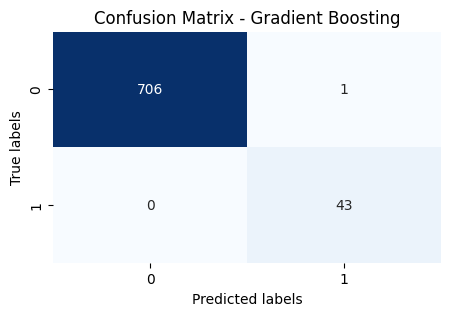

In [194]:
#top 7 features from random forest classifier
important_features = ['PerServiceMonthlyCost', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsageScore', 'NumberOfServices', 'Age']

#selecting the important features 
X_selected = X[important_features]

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#evaluating models using selected features
print("Evaluating models using selected features")
model_evaluation( X_train, X_test, y_train, y_test)


# models with hyperparameter tuning and gridsearchCV

In [195]:
#the models with parameter grids
models = {
    'Logistic Regression': (LogisticRegression(random_state=42, solver='liblinear'),{'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42),{'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(random_state=42),{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42),{'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]})
}

def evaluate_models(models, X_train, X_test, y_train, y_test):
    for model_name, (model, param_grid) in models.items():
        print(f"Model: {model_name}")
        
        #GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        #printing the best parameters and corresponding score
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
        
        #training the model with best parameters
        best_model = grid_search.best_estimator_
        best_model.fit(X_train, y_train)
        
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Test Accuracy: {accuracy:.4f}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        #saving the models
        model_filename = f'E:/STUDY/machine_learning/{model_name.replace(" ", "_")}_model.pkl'
        with open(model_filename, 'wb') as file:
            pickle.dump(best_model, file)

evaluate_models(models, X_train, X_test, y_train, y_test)

Model: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 10.0, 'penalty': 'l2'}
Best cross-validation accuracy: 0.9757
Test Accuracy: 0.9773
[[702   5]
 [ 12  31]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       707
           1       0.86      0.72      0.78        43

    accuracy                           0.98       750
   macro avg       0.92      0.86      0.89       750
weighted avg       0.98      0.98      0.98       750

Model: Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9990
Test Accuracy: 0.9987
[[706   1]
 [  0  43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       0.98      1.00      0.99        43

    accuracy                           1.00       750
   macro av

In [196]:
model_filename = 'E:/STUDY/machine_learning/Random_Forest_model.pkl'
pickelmodel = pickle.load(open(model_filename,'rb'))
pickelmodel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,